# Predicting Seattle Collisions

In [1]:
# importing libraries
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading the data set
filepath = 'data/'
collisions_df = pd.read_csv(filepath + 'collisions.csv')
weather_df = pd.read_csv(filepath + 'weather.csv')

In [298]:
# shape
print(collisions_df.shape, weather_df.shape)

(203190, 40) (5440, 5)


In [299]:
# number of null values
collisions_df.isna().sum()

X                    5216
Y                    5216
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3588
INTKEY             137759
LOCATION             4392
EXCEPTRSNCODE      120404
EXCEPTRSNDESC      193083
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       23113
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        10858
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     175560
UNDERINFL           23011
WEATHER             23179
ROADCOND            23126
LIGHTCOND           23271
PEDROWNOTGRNT      198362
SDOTCOLNUM          75985
SPEEDING           194002
ST_COLCODE           9493
ST_COLDESC          23113
SEGLANEKEY              0
CROSSWALKKEY

In [300]:
# number of null values
weather_df.isna().sum()

DATE    0
AWND    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [301]:
collisions_df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [302]:
weather_df.dtypes

DATE     object
AWND    float64
PRCP    float64
TMAX      int64
TMIN      int64
dtype: object

In [303]:
df_counts = collisions_df[['OBJECTID', 'INCDATE']].groupby('INCDATE').count()
len(df_counts) / 365

14.865753424657534

In [304]:
df_counts.describe()

,OBJECTID
count,5426.000000
mean,37.447475
std,10.613039
min,1.000000
25%,30.000000
50%,37.000000
75%,44.000000
max,103.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


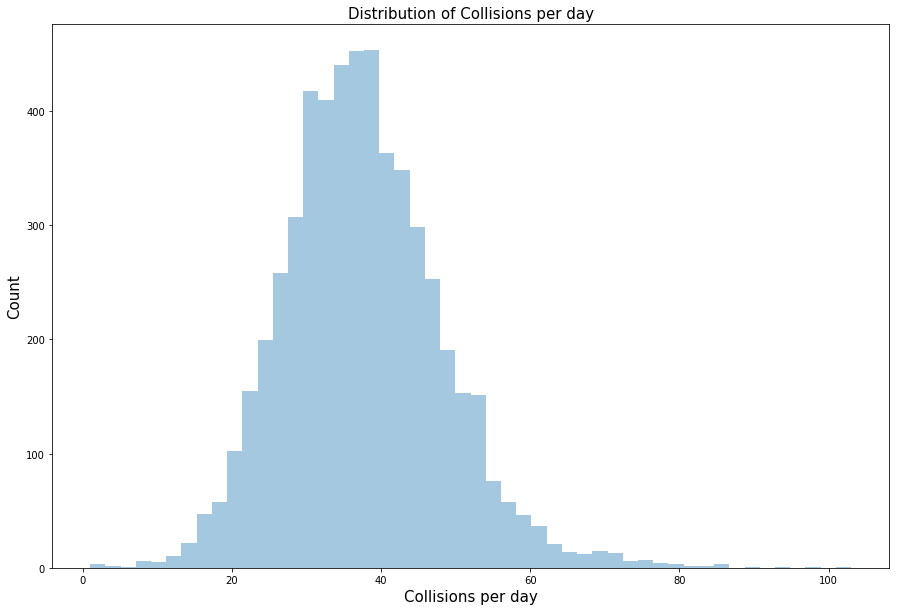

In [305]:
# distribution plot
plt.figure(figsize=(15,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Collisions per day', fontsize=15)
plt.title('Distribution of Collisions per day', fontsize=15)
sns.distplot(df_counts, kde=False)

In [306]:
collisions_df.columns.values

array(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [307]:
# distribution of numeric data
numeric_columns = ['PERSONCOUNT',
                   'PEDCOUNT',
                   'PEDCYLCOUNT',
                   'VEHCOUNT', 
                   'INJURIES',
                   'SERIOUSINJURIES', 
                   'FATALITIES']
categorical_columns = ['STATUS',
                       'ADDRTYPE',
                       'SEVERITYCODE',
                       'COLLISIONTYPE',
                       'JUNCTIONTYPE',
                       'INATTENTIONIND',
                       'UNDERINFL', 
                       'WEATHER', 
                       'ROADCOND', 
                       'LIGHTCOND', 
                       'PEDROWNOTGRNT', 
                       'SPEEDING',
                       'HITPARKEDCAR']
encode_columns = ['WEATHER', 
                  'ROADCOND',
                  'LIGHTCOND',
                  'COLLISIONTYPE',
                  'JUNCTIONTYPE']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f460160>,
      dtype=object)

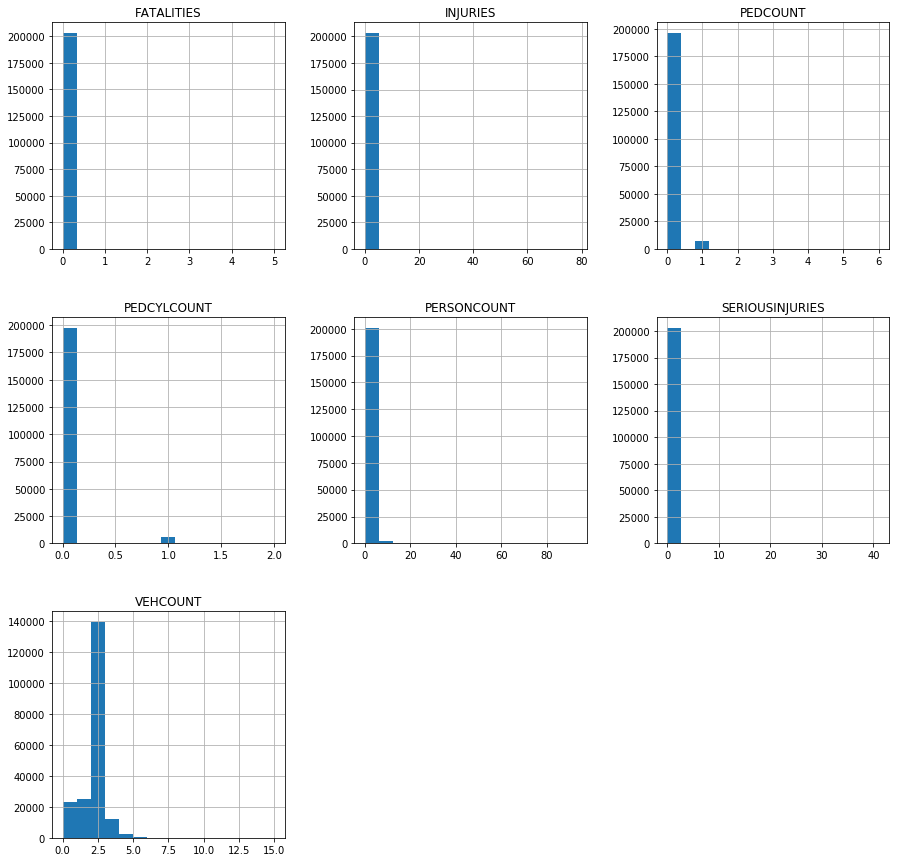

In [308]:
collisions_df[numeric_columns].hist(layout=(3,3), figsize=(15,15), bins=15)

In [309]:
# counts of categorical columns
for column in categorical_columns:
    print(collisions_df[column].value_counts(), '\n')

Matched      180232
Unmatched     22958
Name: STATUS, dtype: int64 

Block           133367
Intersection     65431
Alley              804
Name: ADDRTYPE, dtype: int64 

1     127003
2      53786
0      19253
2b      2835
3        312
Name: SEVERITYCODE, dtype: int64 

Parked Car    45574
Angles        32487
Rear Ended    32106
Other         22770
Sideswipe     17243
Left Turn     12996
Pedestrian     7008
Cycles         5112
Right Turn     2790
Head On        1991
Name: COLLISIONTYPE, dtype: int64 

Mid-Block (not related to intersection)              92348
At Intersection (intersection related)               62859
Mid-Block (but intersection related)                 23641
Driveway Junction                                    10915
At Intersection (but not related to intersection)     2362
Ramp Junction                                          188
Unknown                                                 19
Name: JUNCTIONTYPE, dtype: int64 

Y    27630
Name: INATTENTIONIND, dtype: int64 


In [310]:
unusable_columns = ['EXCEPTRSNCODE',
                    'EXCEPTRSNDESC',
                    'INTKEY',
                    'INATTENTIONIND',
                    'PEDROWNOTGRNT',
                    'SPEEDING']

In [311]:
# dropping unusable columns cause of too many missing values and missing categorical data
collisions_df = collisions_df.drop(columns=unusable_columns)

In [312]:
collisions_df = df.dropna(subset=['LIGHTCOND'])

In [313]:
day_df = collisions_df[collisions_df.LIGHTCOND == 'Daylight']
day_count_df = day_df[['OBJECTID', 'INCDATE']].groupby('INCDATE').count().reset_index()

In [314]:
day_count_df['date'] = pd.to_datetime(day_count_df.INCDATE)
day_count_df.set_index('date', inplace=True)
day_count_df = day_count_df.drop(columns='INCDATE')
day_count_df.columns = ['collisions']

In [315]:
w_df = weather_df.set_index(pd.to_datetime(weather_df.DATE))

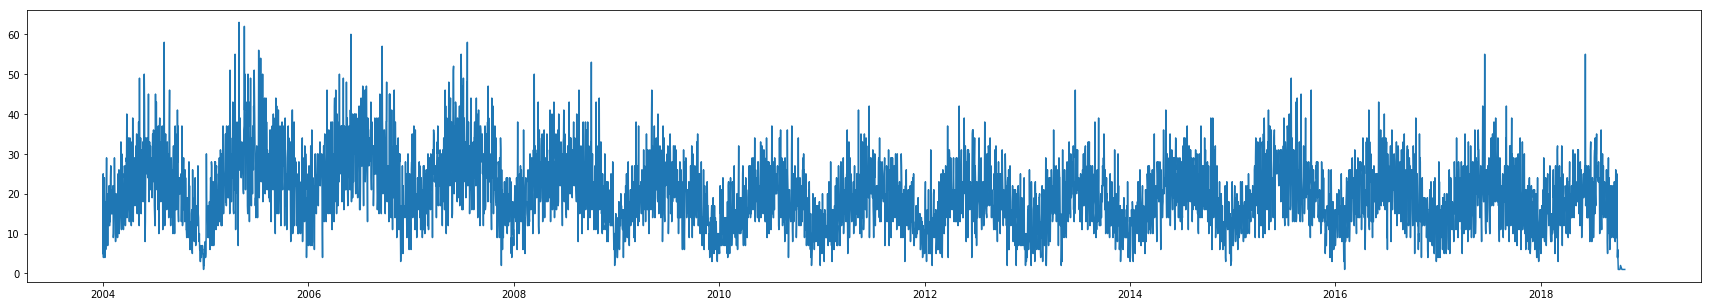

In [316]:
plt.figure(figsize=(30,5))
plt.plot(day_count_df.collisions)

In [317]:
dark_df = collisions_df[collisions_df.LIGHTCOND.str.contains('Dark')]
dark_count_df = dark_df[['OBJECTID', 'INCDATE']].groupby('INCDATE').count().reset_index()

In [318]:
dark_count_df['date'] = pd.to_datetime(dark_count_df.INCDATE)
dark_count_df.set_index('date', inplace=True)
dark_count_df = dark_count_df.drop(columns='INCDATE')
dark_count_df.columns = ['collisions']

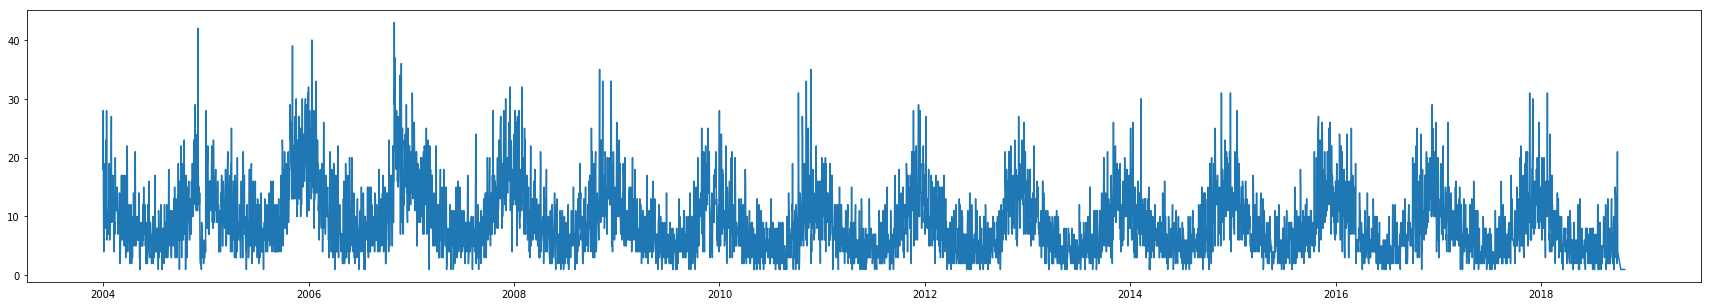

In [319]:
plt.figure(figsize=(30,5))
plt.plot(dark_count_df.collisions)

In [320]:
print('weather: ', len(weather_df))
print('day: ', len(day_count_df), '\ndark: ', len(dark_count_df))

weather:  5440
day:  5394 
dark:  5358


In [321]:
day_weather_df = day_count_df.join(weather_df.set_index('DATE'))
day_weather_df.columns.values

dark_weather_df = dark_count_df.join(weather_df.set_index('DATE'))
dark_weather_df.columns.values

array(['collisions', 'AWND', 'PRCP', 'TMAX', 'TMIN'], dtype=object)

In [322]:
day_num_train = round(len(day_weather_df) * 0.7)

In [323]:
day_train_df = day_weather_df.head(num_train)
day_test_df = day_weather_df.tail(day_weather_df.shape[0] - num_train)

dark_train_df = dark_weather_df.head(num_train)
dark_test_df = dark_weather_df.tail(dark_weather_df.shape[0] - num_train)

In [324]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

# used dengue ai benchmark algorithm
def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = 'collisions \
                    ~ PRCP \
                    + TMAX \
                    + TMIN'
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.collisions)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

In [325]:
day_nbm = get_best_model(day_train_df, day_test_df)
dark_nbm = get_best_model(dark_train_df, dark_test_df)

best alpha =  1e-08
best score =  5.84610630407911
best alpha =  1e-08
best score =  3.2420986093552466


In [326]:
day_nbm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             collisions   No. Observations:                 5394
Model:                            GLM   Df Residuals:                     5390
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21536.
Date:                Wed, 05 Dec 2018   Deviance:                       17419.
Time:                        00:11:15   Pearson chi2:                 1.74e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1530      0.017    129.082      0.000       2.120       2.186
PRCP           0.2020      0.012     17.114      0.000       0.179       0.225
TMAX           0.0115      0.001     22.826      0.000       0.011       0.013
TMIN           0.0027      0.001      3.706      0.000       0.001       0.004
==============================================================================
"""

In [327]:
dark_nbm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             collisions   No. Observations:                 5358
Model:                            GLM   Df Residuals:                     5354
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16885.
Date:                Wed, 05 Dec 2018   Deviance:                       13093.
Time:                        00:11:15   Pearson chi2:                 1.33e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3316      0.023    142.786      0.000       3.286       3.377
PRCP           0.4875      0.014     35.817      0.000       0.461       0.514
TMAX          -0.0234      0.001    -28.364      0.000      -0.025      -0.022
TMIN           0.0041      0.001      3.662      0.000       0.002       0.006
==============================================================================
"""

In [328]:
day_test_df['preds'] = round(day_nbm.predict(day_test_df)).astype(int)
dark_test_df['preds'] = round(dark_nbm.predict(dark_test_df)).astype(int)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [360]:
def plot_actual_preds(actual, preds):
    plt.figure(figsize=(20, 15))
    sns.scatterplot(data=actual, alpha=0.5, label='actual', color='C0')
    sns.scatterplot(data=preds, alpha=0.5, label='preds', color='C1')
    plt.title('Actual vs Prediction of Collisions in the Day', fontsize=15)
    plt.legend(fontsize=15)

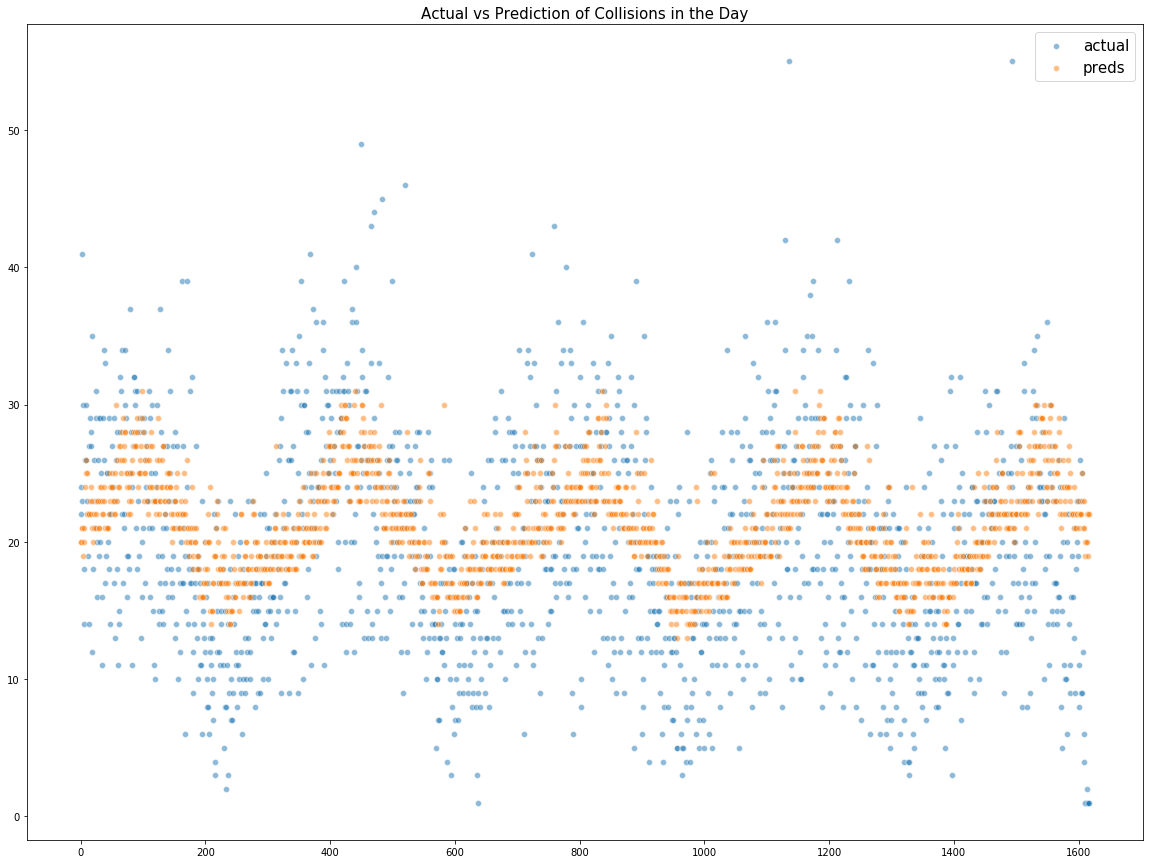

In [361]:
plot_actual_preds(day_test_df.collisions.values, day_test_df.preds.values)

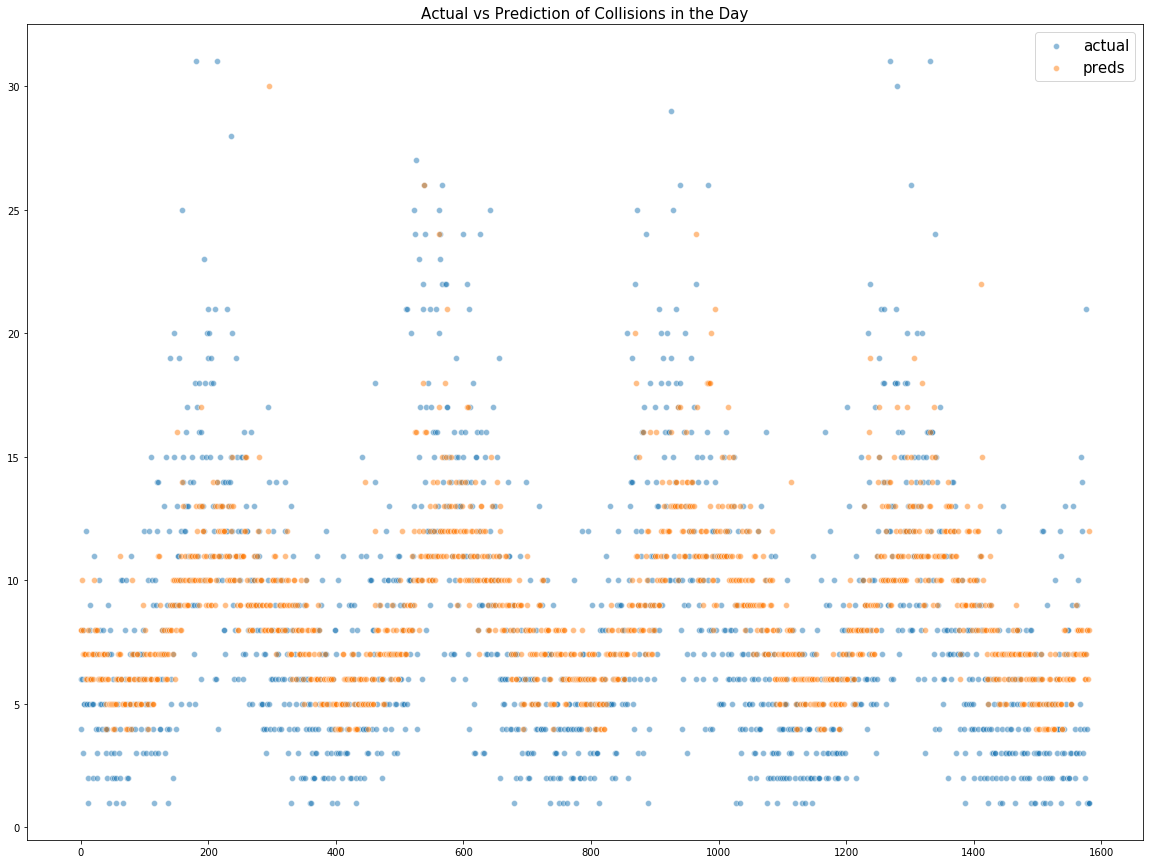

In [362]:
plot_actual_preds(dark_test_df.collisions.values, dark_test_df.preds.values)

In [332]:
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import Booster

In [333]:
# returns model
def get_model(X, y, estimator, param_grid):            
    
    grid_search = GridSearchCV(estimator=estimator, 
                               param_grid=param_grid, 
                               scoring="neg_mean_absolute_error", 
                               n_jobs=1, 
                               cv=KFold(n_splits=10, shuffle=True, random_state=1))
    
    grid_result = grid_search.fit(X=X, y=y)
    print(grid_result.best_score_)
    print(grid_result.best_params_)
    return grid_result

In [334]:
# defining the regressors
xgb_regressor = XGBRegressor()
rf_regressor = RandomForestRegressor()
gb_regressor = GradientBoostingRegressor()
sv_regressor = SVR()

In [386]:
# splitting to subtrain and subtest for both cities to be used in cross validation
from sklearn.model_selection import train_test_split
day_train_X, day_test_X, day_train_y, day_test_y = train_test_split(day_train_df.drop(columns=['collisions','AWND', 'PRCP']), 
                                                                day_train_df.collisions,
                                                                test_size = 0.3)
dark_train_X, dark_test_X, dark_train_y, dark_test_y = train_test_split(dark_train_df.drop(columns=['collisions','AWND', 'PRCP']),
                                                                dark_train_df.collisions,
                                                                test_size = 0.3)

In [392]:
# XGB baseline models
day_xgb_bm = xgb_regressor.fit(day_train_X, day_train_y)
dark_xgb_bm = xgb_regressor.fit(dark_train_X, dark_train_y)

day_xgb_bm_y = day_xgb_bm.predict(day_test_X)
dark_xgb_bm_y = dark_xgb_bm.predict(dark_test_X)

print('SJ XGBoost baseline MAE:', mean_absolute_error(day_xgb_bm_y, day_test_y))
print('IQ XGBoost baseline MAE:', mean_absolute_error(dark_xgb_bm_y, dark_test_y))

SJ XGBoost baseline MAE: 12.254453906314307
IQ XGBoost baseline MAE: 4.464863837343975


In [369]:
day_test_df.collisions.values.shape

(1618,)

In [3]:
from geopy.geocoders import Nominatim
import urllib
import certifi
def uo(args, **kwargs):
    return urllib.request.urlopen(args, cafile=certifi.where(), **kwargs)

geolocator = Nominatim()

geolocator.urlopen = uo 
location = geolocator.reverse(coords)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


NameError: name 'coords' is not defined

In [4]:
print(location.raw['address']['suburb'])
print(location.raw['address']['postcode'])

NameError: name 'location' is not defined

In [3]:
from geopy.geocoders import Nominatim
import urllib
import certifi
def uo(args, **kwargs):
    return urllib.request.urlopen(args, cafile=certifi.where(), **kwargs)

geolocator = Nominatim()
geolocator.urlopen = uo 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [8]:
for i in range(len(collisions_df)):
    suburbs = []
    zipcodes = []
    lat = collisions_df.Y.values[i]
    long = collisions_df.X.values[i]
    if (np.all(pd.notnull(lat))):
        location = geolocator.reverse((collisions_df.Y.values[i],collisions_df.X.values[i]))
        address = location.raw['address']
        if ('suburb' in address):
            sub = address['suburb']
        else:
            sub = np.nan
        if ('postcode' in address):
            zc = address['postcode']
        else:
            zc = np.nan
        print(sub, zc)
        suburbs.append(sub)
        zipcodes.append(zc)
    else:
        suburbs.append(np.nan)
        zipcodes.append(np.nan)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: cafile, cpath and cadefault are deprecated, use a custom context instead.
  """


Belltown 98181
Westlake 98109
Rainier Valley 98118
West Seattle 98126
Rainier Valley 98118
Georgetown 98108
Madison Park 98100
Beacon Hill 98144
West Seattle 98116
Phinney Ridge 98103
West Seattle 98116
Westlake 98109
Central District 98122
Madison Park 98105
Rainier Valley 98118
Queen Anne 98119
Ballard 98127
Ballard 98107
nan 98178
Magnolia 98199
Rainier Valley 98118
Queen Anne 98119
Green Lake 98115
Delridge 98136
Northgate 98175
Rainier Valley 98118
Wallingford 98103
Belltown 98109
First Hill 98101
Belltown 98109
First Hill 98101
West Seattle 98116
Rainier Valley 98118
Ballard 98107
Mount Baker 98144
Ballard 98107
Greenwood 98133-9145
Belltown 98121
Georgetown 98134
Northgate 98125
West Seattle 98106-1499
Wedgwood 98115
Rainier Valley 98108
Maple Leaf 98115
Lake City 98165
International District/Chinatown 98104
Madrona 98122
Georgetown 98108
Rainier Valley 98118
International District/Chinatown 98104
International District/Chinatown 98174
Madison Park 98105
University District 9810

GeocoderTimedOut: Service timed out

In [5]:
collisions = collisions_df.dropna(subset=['X', 'Y'])

In [6]:
latlng = list(zip(collisions.Y, collisions.X))
locations = geolocator.reverse(latlng, exactly_one=False)

ValueError: Must be a coordinate pair or Point

In [97]:
collisions_df['suburb'] = np.vectorize(geolocator.reverse)((collisions_df.Y, collisions_df.X))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopy/point.py:180: UserWarning: A single number has been passed to the Point constructor. This is probably a mistake, because constructing a Point with just a latitude seems senseless. If this is exactly what was meant, then pass the zero longitude explicitly to get rid of this warning.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: cafile, cpath and cadefault are deprecated, use a custom context instead.
  """


ValueError: setting an array element with a sequence

In [99]:
collisions = pd.read_csv(filepath + 'seattle_collisions_weather.csv')

In [100]:
collisions.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'collision_long', 'collision_lat',
       'collision_incident_key', 'collision_report_no',
       'collision_status', 'collision_address_type',
       'collision_intersection_key', 'collision_address',
       'collision_severity_code', 'collision_severity_description',
       'collision_type', 'collision_person_count',
       'collision_pedestrian_count', 'collision_bicycle_count',
       'collision_vehicle_count', 'collision_total_injuries',
       'collision_total_serious_injuries', 'collision_fatalities',
       'collision_incident_date', 'collision_incident_time',
       'collision_junction_type', 'collision_sdot_col_code',
       'collision_sdot_col_desc', 'collision_due_to_inattention',
       'collision_under_influence_of_drugs_alcohol',
       'collision_weather_conditions', 'collision_road_conditions',
       'collision_light_conditions', 'collision_pedestrian_right_of_way',
       'collision_sdot_colnum', 'collision_speeding_factor_in_coll

In [ ]:
df.dropna(subset=['collision_lat', 'collision_long'])

In [110]:
collisions_df['suburb'] = collisions_df.apply(lambda x: print(geolocator.reverse((x['Y'], x['X'])).raw['address']['suburb'])
                                              if (np.all(pd.notnull(x['Y']))) else x['Y'], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: cafile, cpath and cadefault are deprecated, use a custom context instead.
  """


Belltown
Westlake
Rainier Valley
West Seattle
Rainier Valley
Georgetown
Madison Park
Beacon Hill
West Seattle
Phinney Ridge
West Seattle
Westlake
Central District
Madison Park
Rainier Valley
Queen Anne
Ballard
Ballard
Belltown
Westlake
Rainier Valley
West Seattle
Rainier Valley
Georgetown
Madison Park
Beacon Hill
West Seattle
Phinney Ridge
West Seattle
Westlake
Central District
Madison Park
Rainier Valley
Queen Anne
Ballard
Ballard


KeyError: ('suburb', 'occurred at index 19')

In [ ]:
collisions_df['suburb'] = collisions_df.apply(lambda x: geolocator.reverse((x['Y'], x['X'])) if (np.all(pd.notnull(x['Y']))) else x['Y'], axis=1)

In [52]:
print(location.address)

SDOT, News Lane, West Edge, Belltown, Seattle, King County, Washington, 98181, USA


In [29]:
location = locator.reverse("52.509669, 13.376294")
print(location.address)

GeocoderServiceError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1051)

In [41]:
import reverse_geocoder as rg

coordinates = (-37.81, 144.96)
results = rg.search(coords)
print(results)

[OrderedDict([('lat', '47.60621'), ('lon', '-122.33207'), ('name', 'Seattle'), ('admin1', 'Washington'), ('admin2', 'King County'), ('cc', 'US')])]
